In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
i=load_iris()

In [2]:
dir(i)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
i.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(i.data,columns=i.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=i.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
i.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df['flower_name']=df.target.apply(lambda x:i.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
from matplotlib import pyplot as plt 
%matplotlib inline
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


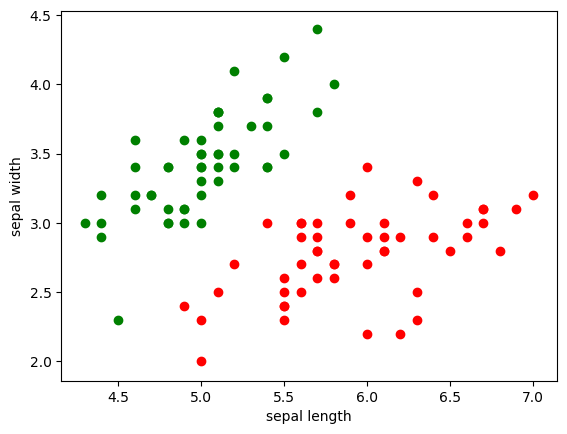

In [10]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')

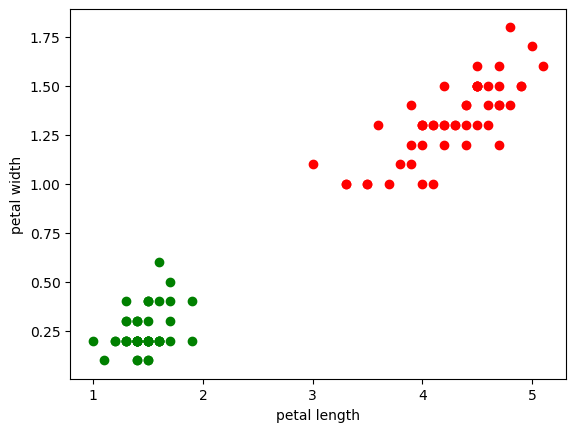

In [11]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y=df.target

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svm.score(x_test,y_test)

0.9

In [18]:
# Get predicted and actual labels
p=svm.predict([x_test.iloc[0]])[0]
a=y_test.iloc[0]
# Get flower names using 'i.target_names'
pf= i.target_names[p]
af=i.target_names[a]
s=[[4.5, 2.3, 1.3, 0.3]]
print("Sample features:",s)
print("Predicted Label:",p, "→",pf)
print("Actual Label:",a, "→",af)
if p==a:
    print("Prediction is correct.")
else:
    print("Prediction is incorrect.")


Sample features: [[4.5, 2.3, 1.3, 0.3]]
Predicted Label: 1 → versicolor
Actual Label: 1 → versicolor
Prediction is correct.
